In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def random_orthogonal_basis(k, attack=False):
    """
    Generates a random orthogonal basis for R^k.

    Parameters:
    k (int): Dimension of the space.

    Returns:
    np.ndarray: A k x k orthogonal matrix whose columns form an orthogonal basis.
    """
    # Generate a random k x k matrix with entries from a standard normal distribution
    A = np.random.randn(k, k)
    if attack:
        # correct A to start with the cursed vector
        A[:,0] = -np.ones(k)
        A[0,0] = k**(1/2)
        A[:,1] = 0
        A[0,1] = 1
        A = A.T
    # Perform QR decomposition on A
    Q, R = np.linalg.qr(A)
    return Q

def gram_schmidt(A):
    # Perform QR decomposition on A
    Q, R = np.linalg.qr(A)
    return Q

# Example usage:
k = 100  # Dimension of the space
basis = random_orthogonal_basis(k)
print(f"Random orthogonal basis for R^{k}:")

Random orthogonal basis for R^100:


In [3]:
def inf(matrix):
    """
    Computes the infinity norm of a matrix.

    Parameters:
    matrix (array-like): A 2D list or NumPy array representing the matrix.

    Returns:
    float: The infinity norm of the matrix.
    """
    # Ensure the input is a NumPy array
    matrix = np.array(matrix)
    
    # Compute the infinity norm
    rowsinf = np.sum(np.abs(matrix), axis=1)
    
    infinity_norm = np.max(rowsinf) # np.sort(np.sum(np.abs(matrix), axis=1))[int(k-1)] #
    idx = np.argmax(rowsinf)
    return infinity_norm, idx

In [4]:
def get_fourier(k):
    mat = np.zeros((k,k))
    x = np.pi*np.arange(k)/k
    for i in range(k):
        mat[:,i] = np.cos(i*x)/(k**0.5)
    return mat

def get_poly(k):
    mat = np.zeros((k,k))
    x = 2*np.arange(k)/k-1
    for i in range(k):
        mat[:,i] = x**i/(k**0.5)
    return mat


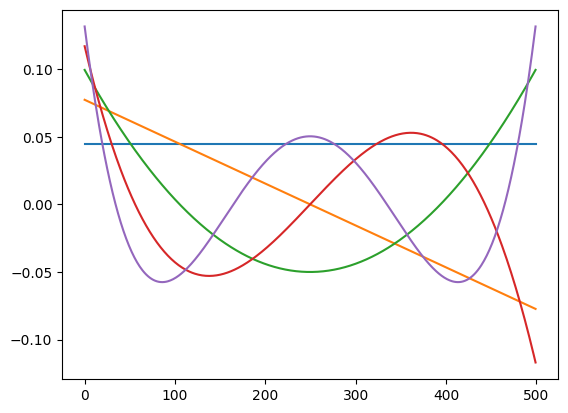

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
28

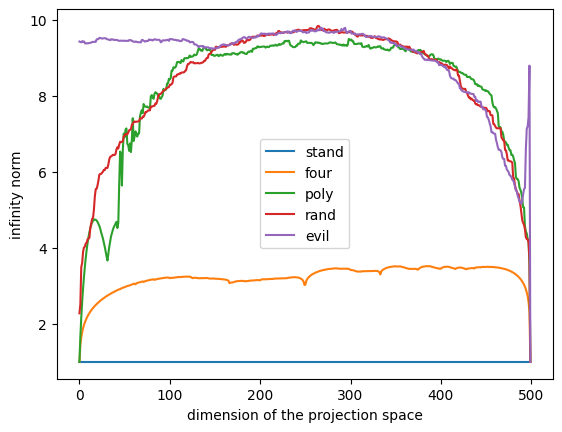

In [5]:
k = 500
x = np.arange(k)
basis_stand = np.identity(k)
basis_four = gram_schmidt(get_fourier(k))
basis_poly = gram_schmidt(get_poly(k))
basis_rand = random_orthogonal_basis(k)
basis_evil = random_orthogonal_basis(k, attack=True)

for i in range(5):
    plt.plot(-basis_poly[:,i])
plt.show()

basis_list = [basis_stand, basis_four, basis_poly, basis_rand, basis_evil]
labels = ['stand', 'four', 'poly', 'rand', 'evil']

for i in range(len(basis_list)):   

    # choose the basis
    basis = basis_list[i]
    mat = np.zeros((k,k))

    # infnorms collects the infinity norm of the matrices
    infnorms = np.zeros(k)

    for d in range(k):

        # we incrementally update the matrix adding more and more basis functions
        mat += np.dot(basis[:,d:d+1], basis[:,d:d+1].T)
        infnorms[d], _ = inf(mat)
        if i == 2 and infnorms[d] > 4.2:
            print(d)

    plt.plot(x, infnorms, label = labels[i])


plt.legend()
plt.xlabel('dimension of the projection space')
plt.ylabel('infinity norm')
plt.show()

In [102]:
N = 4000
ang = np.linspace(0,np.pi/2,N)
max_norm = 0
max_ang = 0
d = 20
J = d-2
kmax = 0

for i in range(N):
    angle = ang[i]
    U = get_rotation_matrix(d=d, i=0, j=1, angle=angle)
    for j in range(J):
        U2 = get_rotation_matrix(d=d, i=0, j=2+j, angle=angle)
        U = np.dot(U,U2)

    for k in range(d-1):
        Z = np.dot(U,U2)[:,:k]
        proj = np.dot(Z,Z.T)
        norm, vec = inf(proj)

        if norm > max_norm:
            max_norm = norm
            max_ang = angle
            max_k = k

print(max_norm, max_ang*(180/np.pi), max_k)

# in case of disjoint angles: take the maximum of the axes

2.6744654107594172 80.66016504126031 1


In [93]:
angle = 0*np.pi/16
angle1 = 6*np.pi/16

U = get_rotation_matrix(d=d, i=0, j=d-2, angle=angle)
U2 = get_rotation_matrix(d=d, i=0, j=d-1, angle=angle1)
Z = np.dot(U,U2)[:,:1]
proj = np.dot(Z,Z.T)
norm, vec = inf(proj)
norm

1.2071067811865475

In [6]:
def get_rotation_matrix(d, i, j, angle):
    if i>d-1 or j>d-1:
        raise ValueError("indexes must be in range(d)")
    mat = np.eye(d)
    mat[i,i] = np.sin(angle)
    mat[i,j] = np.cos(angle)
    mat[j,i] = np.cos(angle)
    mat[j,j] = -np.sin(angle)
    return mat

In [35]:
def test_submodularity(basis, iter=1000):
    k = basis.shape[1]
    maxim = -100
    for i in range(iter):
        mat = []
        vec = []
        rs = np.random.choice(k,size=3,replace=False)

        for i in range(3):
            r = rs[i]
            vec.append(basis[:,r])
            mat.append(np.dot(basis[:,r:r+1], basis[:,r:r+1].T))
        
        z = inf(mat[0]+mat[1]+mat[2]) - inf(mat[0]+mat[1]) - inf(mat[0]+mat[2]) + inf(mat[0])
        if z > maxim:
            maxim = z
            retvecs = vec
    
    return maxim, retvecs
        


In [36]:
k = 4
vecs = []
maxim = 0
for _ in range(1000):
    basis = random_orthogonal_basis(k)
    z, vecs = test_submodularity(basis, iter=min(1000,k**3))
    if z > maxim:
        retvecs = vecs
        maxim = z


In [36]:
## create random basis of dimension k
k = 200
d = 50
basis = random_orthogonal_basis(k)
starting_matrix = np.dot(basis[:,:d],basis[:,:d].T)
print(inf(starting_matrix))

5.862956939070147


In [7]:
## this time we add, at each time, the matrix which maked the infinity norm smaller

def choose_f(M, vectors):
    mio = 100000
    idx = 0
    for i in range(vectors.shape[1]):
        v = vectors[:,i:i+1]
        info = inf(M+np.dot(v,v.T))
        if info < mio:
            mio = info
            idx = i
    return idx, info

def build_low_mat(basis, d):
    idx = 0
    M = np.zeros((basis.shape[0],basis.shape[0]))
    residual = np.copy(basis)
    for i in range(d):
        v = residual[:,idx:idx+1]
        M += np.dot(v,v.T)
        residual = np.hstack((residual[:,:idx], residual[:,idx+1:]))
        idx, info = choose_f(M, residual)
    return info

k = 200
d = 100
basis = random_orthogonal_basis(k)


starting_matrix = np.dot(basis[:,:d],basis[:,:d].T)
print(inf(starting_matrix))
print(build_low_mat(basis, d))

6.4423933847542925
6.271312915422958


In [11]:


def compute_w_proj(V,W):

    # compute inner matrix that is going to be inverted
    Inner = np.dot(V.T,np.dot(W,V))
    In = np.linalg.inv(Inner)

    # compute actual projection matrix
    P = np.dot(np.dot(V, np.dot(In, V.T)), W)
    return P

def matrix_derivarive(V, W):

    # compute inner matrix that is going to be inverted
    Inner = np.dot(V.T,np.dot(W,V))
    In = np.linalg.inv(Inner)

    # compute actual projection matrix
    P = np.dot(np.dot(V, np.dot(In, V.T)), W)

    
    return P

In [9]:
W = np.eye(k)/k

compute_w_proj(basis, W).shape

(200, 200)

In [35]:
# test convexity. We choose some data distribution to show that the 
# weighted infinity norm is *not* a convex function of the (vector-valued) input
import numpy as np

def test_conv(f, d, samp=1000):
    rands = np.random.uniform(size=(samp,d))
    sums = np.sum(rands, axis=1)
    sums = sums[:, np.newaxis]
    rands = rands/sums

    fvec = np.zeros(samp)
    fvec[0] = f(rands[0,:])

    for i in range(samp-1):
        fvec[i+1] = f(rands[i+1,:])

        mean = (rands[i] + rands[i+1])/2
        if f(mean) > (fvec[i] + fvec[i+1])/2:
            print(f(mean) - (fvec[i] + fvec[i+1])/2)
            return False
    
    return True

def fun(x):
    return x[0] + x[1] + x[1]**2

test_conv(fun, 2)


True

In [44]:
#### define the function giving the effectiveness of every data distribution
k = 100
d = 30
basis = random_orthogonal_basis(k=k)

# orthogonal matrix
V = basis[:,:d]

def compute_w_proj(V,W):

    # compute inner matrix that is going to be inverted
    Inner = np.dot(V.T,np.dot(W,V))
    In = np.linalg.inv(Inner)

    # compute actual projection matrix
    P = np.dot(np.dot(V, np.dot(In, V.T)), W)
    return P


# mu given distribution on the k elelments
def optimizer(w):
    W = np.diag(w)
    Mat = compute_w_proj(V,W)
    return inf(Mat)
    

In [45]:
test_conv(optimizer, d=k)

True

In [ ]:
def valle_poussin(rho, basis, d):
    '''
    rho: weights (length D)
    basis: ALL the elements that we are going to consider
    d: the first d are already in, we cannot do anything about it
    '''
    D = len(rho)
    M = np.dot(basis[:,:d],basis[:,:d].T)
    print('initial guess: '+str(inf(M)))
    for r in range(d+1,d+D+1):
        v = basis[:,r]
        v = v[:,np.newaxis]
        M += rho[r-d-1]*np.dot(v, v.T)
    return inf(M)


k = 100
basis = random_orthogonal_basis(k, attack=True)
d = 1
D = 5
rho = np.ones(D)
valle_poussin(rho, basis, d)

initial guess: (4.580425715786257, 0)


(4.485206768404949, 0)

In [31]:
def objective_fun(M, rho, basis, d):
    '''
    rho: weights (length D)
    basis: ALL the elements that we are going to consider
    d: the first d are already in, we cannot do anything about it
    '''
    D = len(rho)
    for r in range(d+1,d+D+1):
        v = basis[:,r]
        v = v[:,np.newaxis]
        M += rho[r-d-1]*np.dot(v, v.T)
    return inf(M)


def get_gradient(M, rho, basis, d, j):
    '''
    Compute the derivative of the infinity norm w.r.t.
    component j
    '''
    D = len(rho)
    for r in range(d+1,d+D+1):
        v = basis[:,r]
        v = v[:,np.newaxis]
        M += rho[r-d-1]*np.dot(v, v.T)


    load = 0
    m = 0
    for n in range(M.shape[1]):
        if M[n,m] > 0:
            load += basis[m,j]*basis[n,j]
        else:
            load = basis[m,j]*basis[n,j]

    return load



def optimizer(M, basis, d, D, iter=100, lr=0.1):

    rho = np.ones(D)

    for it in range(iter):
        grad = np.zeros(D)
        for j in range(D):
            grad[j] = get_gradient(np.copy(M), rho, basis, d, D+j)
        rho = rho - lr*grad
        print('Objective function: '+str(objective_fun(np.copy(M), rho, basis, d)))

k = 100
basis = random_orthogonal_basis(k, attack=True)
d = 1
M = np.dot(basis[:,:d],basis[:,:d].T)
D = 10
optimizer(M, basis, d, D)

Objective function: (4.268688556483643, 0)
Objective function: (4.268899688298416, 0)
Objective function: (4.2691108201131875, 0)
Objective function: (4.2693219519279575, 0)
Objective function: (4.26953308374273, 0)
Objective function: (4.269744215557502, 0)
Objective function: (4.2699553473722744, 0)
Objective function: (4.270166479187046, 0)
Objective function: (4.270377611001819, 0)
Objective function: (4.27058874281659, 0)
Objective function: (4.270799874631362, 0)
Objective function: (4.271011006446133, 0)
Objective function: (4.271222138260904, 0)
Objective function: (4.2714332700756765, 0)
Objective function: (4.271644401890448, 0)
Objective function: (4.271855533705222, 0)
Objective function: (4.272067141768398, 0)
Objective function: (4.272327051401739, 0)
Objective function: (4.27258696103508, 0)
Objective function: (4.27284687066842, 0)
Objective function: (4.273106780301762, 0)
Objective function: (4.273366689935104, 0)
Objective function: (4.273626599568445, 0)
Objective f